#<center>**Klasifikasi Energi di dalam Sirtuin6**

Nama : Indah Kharisma

NIM : 210411100147

Kelas : Proyek Sain Data A

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PSD/sirtuin6

Mounted at /content/drive
/content/drive/MyDrive/PSD/sirtuin6


In [2]:
# Import Library
import os
import numpy as np
import pandas as pd

### **DESKRIPSI DATASET**

### Dataset ini mengklasifikasikan ikatan dalam protein yang bernama "sirtuin6" tersebut memiliki energi yang **tinggi** atau **rendah**

#**Proses Pengolahan Data**

In [3]:
#Read data file csv
data = pd.read_csv("SIRTUIN6.csv")
df = pd.DataFrame(data)
df

,SC_5,SP_6,SHBd,minHaaCH,maxwHBa,FMF,Class
0,0.540936,7.64192,0.162171,0.445270,2.205570,0.467742,High_BFE
1,0.815332,6.59011,0.000000,0.497445,2.003140,0.415385,High_BFE
2,0.734399,6.85522,0.000000,0.507748,1.885900,0.400000,High_BFE
3,0.624557,7.00949,0.450300,0.483648,2.027570,0.500000,High_BFE
4,0.460290,4.92643,0.448998,0.482293,2.064380,0.536585,High_BFE
...,...,...,...,...,...,...,...
95,0.083333,3.50569,0.000000,0.438522,2.221560,0.307692,Low_BFE
96,0.707068,4.58381,0.000000,0.000000,0.011251,0.153846,Low_BFE
97,0.216506,3.09490,0.000000,0.000000,0.000000,0.326531,Low_BFE
98,0.271018,2.39997,0.000000,0.356727,2.346090,0.342105,Low_BFE


### **PENJELASAN FITUR**

**SC_5** = parameter sequential dalam molekul

**SP_6** = karakteristik posisi ke-6 dalam molekul

**SHBd** = jumlah atom hidrogen

**minHaaCH** = jumlah minimum atom

**maxwHBa** = berat maksimum atom

**FMF** = ukuran molekul / atom

### **Penjelasan Kelas**

Terdapat 2 kelas yaitu **High_BFE** dan **Low_BFE** dimana kelas tersebut menunjukkan apakah protein memiliki energi yang tinggi(High_BFE) atau rendah(Low_BFE)

In [4]:
print("Banyaknya data : ", df.shape[0])
print("Banyaknya kolom : ", df.shape[1])

Banyaknya data :  100
Banyaknya kolom :  7


jumlah data ada 100

dengan jumlah masing-masing kelas sebanyak 50 data

tipe data numeric, tidak ada data kosong


##**Identifikasi Missing Value**

In [5]:
# Menghitung apakah ada nilai yang hilang dalam setiap kolom
missing_values = df.isna().any()

# Menampilkan hasil
print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)
nan_data = df[df.isna().any(axis=1)]
print("Data dengan nilai NaN:")
print(nan_data)

Apakah ada nilai yang hilang dalam setiap kolom:
SC_5        False
SP_6        False
SHBd        False
minHaaCH    False
maxwHBa     False
FMF         False
Class       False
dtype: bool
Data dengan nilai NaN:
Empty DataFrame
Columns: [SC_5, SP_6, SHBd, minHaaCH, maxwHBa, FMF, Class]
Index: []


## **Identifikasi Duplikasi Data**

In [6]:
jumlah_duplikat = df.duplicated().sum()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 0


## **Eksplorasi Data**

In [7]:
# Import library
import matplotlib.pyplot as plt

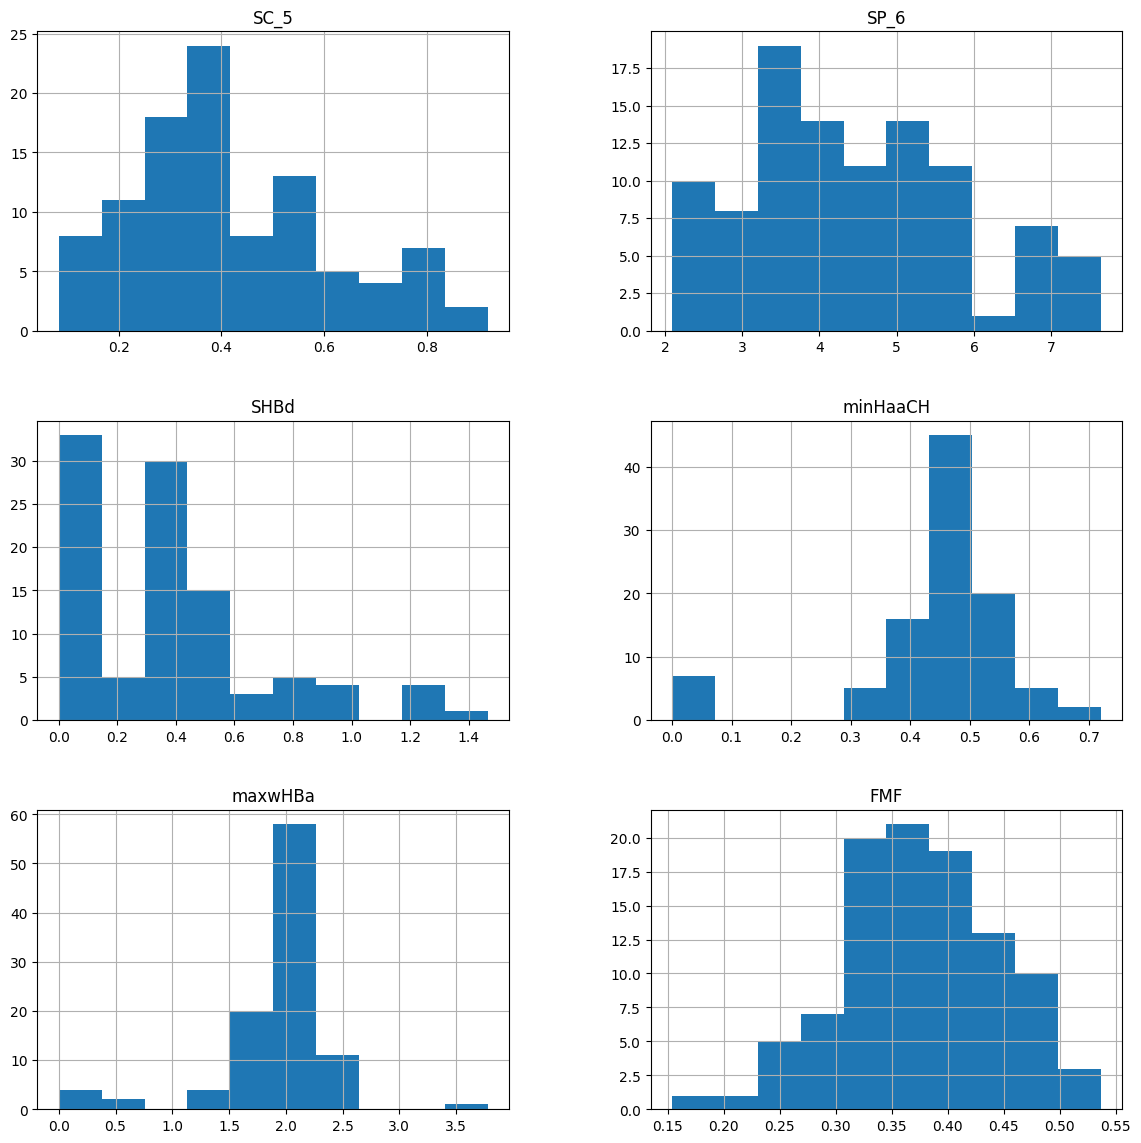

In [8]:
# Distribusi data
df.hist(figsize=(14, 14))
# Simpan gambar sebelum menampilkan
plt.savefig('histogram.png')
# Tampilkan plot
plt.show()

# **PREPROCESSING**

## **NORMALISASI MINMAX SETELAH SPLIT DATA (normalisasi bisa dilakukan sebelum atau sesudah split data)**

**Normalisasi Min-Max** adalah salah satu teknik preprocessing data yang digunakan untuk mengubah skala data numerik ke dalam rentang tertentu, biasanya dari 0 hingga 1. Tujuan utama dari normalisasi Min-Max adalah untuk menjaga skala data sehingga nilai-nilai dari berbagai fitur atau variabel memiliki rentang yang serupa, sehingga model pembelajaran mesin dapat bekerja lebih efisien dan tidak terpengaruh oleh perbedaan skala.

Gunakan Rumus Normalisasi Min-Max: Untuk setiap nilai dalam fitur, gunakan rumus berikut untuk menghitung nilai yang telah dinormalisasi (X_normalized):
      
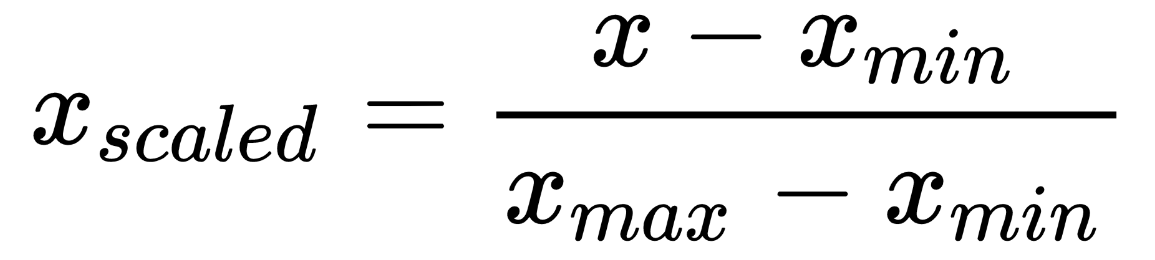

di mana:
  - X adalah nilai asli dalam fitur.
  - Min adalah nilai minimum dalam fitur.
  - Max adalah nilai maksimum dalam fitur.


**Pemisahan dataset**, atau splitting dataset, adalah proses membagi dataset menjadi dua atau lebih subset yang berbeda. Tujuan utama dari pemisahan dataset adalah untuk memungkinkan evaluasi dan pengujian model pembelajaran mesin dengan benar.
  - Memisahkan Fitur dan Target: Dataset asli (data) dibagi menjadi dua bagian: fitur (X) dan target (Y). Fitur adalah kolom data yang akan digunakan sebagai input untuk model pembelajaran mesin, sedangkan target adalah kolom yang akan diprediksi oleh model.
  - Memisahkan Data Latihan dan Data Uji: Fungsi train_test_split digunakan untuk membagi dataset menjadi data latihan (X_train dan Y_train) dan data uji (X_test dan Y_test). Parameter test_size = 0.2 menentukan bahwa 20% dari data akan menjadi data uji, sementara 80% sisanya akan menjadi data latihan. Parameter random_state = 42 digunakan untuk mengatur seed (bilangan acak awal) sehingga pembagian dataset ini dapat direproduksi jika diperlukan.
  - Menampilkan Informasi Dataset: Kode selanjutnya mencetak jumlah total data dalam dataset (X.shape[0]), jumlah data latihan (X_train.shape[0]), dan jumlah data uji (X_test.shape[0]).

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pickle import dump

# Anggap Anda memiliki DataFrame df dengan fitur dan variabel target
X = df.drop('Class', axis=1)
y = df['Class']

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print Data Latih dan Data Uji
print("Data Keseluruhan : ", X.shape[0])
print("Data Latih : ", X_train.shape[0])
print("Data Uji   : ", X_test.shape[0])

# Normalisasi Min-Max pada data training
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Menyimpan model yang telah dilatih
dump(minmax_scaler, open('scaler_sirtuin6.pkl', 'wb'))

Data Keseluruhan :  100
Data Latih :  70
Data Uji   :  30


# **PYCARET**

**PyCaret** adalah pustaka pembelajaran mesin sumber terbuka Python yang dirancang untuk memudahkan pelaksanaan tugas standar dalam proyek pembelajaran mesin.

Ini adalah versi Python dari paket pembelajaran mesin Caret di R, populer karena memungkinkan model dievaluasi, dibandingkan, dan disesuaikan pada kumpulan data tertentu hanya dengan beberapa baris kode.

Pustaka PyCaret menyediakan fitur-fitur ini, memungkinkan praktisi pembelajaran mesin dengan Python memeriksa serangkaian algoritme pembelajaran mesin standar pada kumpulan data klasifikasi atau regresi dengan satu panggilan fungsi.

In [15]:
!pip install pycaret

In [16]:
data_pycaret = pd.read_csv('https://raw.githubusercontent.com/risma260/PSD/main/SIRTUIN6.csv')
data_pycaret.head()

,SC_5,SP_6,SHBd,minHaaCH,maxwHBa,FMF,Class
0,0.540936,7.64192,0.162171,0.445270,2.20557,0.467742,High_BFE
1,0.815332,6.59011,0.000000,0.497445,2.00314,0.415385,High_BFE
2,0.734399,6.85522,0.000000,0.507748,1.88590,0.400000,High_BFE
3,0.624557,7.00949,0.450300,0.483648,2.02757,0.500000,High_BFE
4,0.460290,4.92643,0.448998,0.482293,2.06438,0.536585,High_BFE


In [18]:
from pycaret.classification import *
from sklearn.metrics import accuracy_score

# Inisialisasi pycaret
s = setup(data_pycaret, target='Class', session_id=123)

# Bandingkan beberapa model
best_model = compare_models(fold=5)

# Membuat model terpilih (tanpa tuning)
selected_model = create_model(best_model)

# Melakukan normalisasi Min-Max pada seluruh fitur
from sklearn.preprocessing import MinMaxScaler

X_train = get_config('X_train')
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Melatih model terpilih pada seluruh fitur
selected_model.fit(X_train_minmax, y_train)

# Melakukan prediksi pada data testing yang telah dinormalisasi
y_pred_selected = selected_model.predict(X_test_minmax)

# Mengukur akurasi model terpilih
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy with all features: {accuracy_selected * 100:.4f}%")

# Menampilkan model terpilih
selected_model

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Target mapping,"High_BFE: 0, Low_BFE: 1"
4,Original data shape,"(100, 7)"
5,Transformed data shape,"(100, 7)"
6,Transformed train set shape,"(70, 7)"
7,Transformed test set shape,"(30, 7)"
8,Numeric features,6
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8571,0.9163,0.8571,0.8839,0.8537,0.7143,0.7401,0.3000
lightgbm,Light Gradient Boosting Machine,0.8286,0.8898,0.8286,0.8417,0.8265,0.6571,0.6700,0.1560
et,Extra Trees Classifier,0.8143,0.9061,0.8143,0.8294,0.8111,0.6286,0.6434,0.1780
knn,K Neighbors Classifier,0.8000,0.8184,0.8000,0.8208,0.7962,0.6000,0.6201,0.1580
nb,Naive Bayes,0.8000,0.9061,0.8000,0.8169,0.7967,0.6000,0.6166,0.1000
qda,Quadratic Discriminant Analysis,0.8000,0.9061,0.8000,0.8228,0.7967,0.6000,0.6220,0.0320
gbc,Gradient Boosting Classifier,0.8000,0.8878,0.8000,0.8270,0.7933,0.6000,0.6248,0.0980
xgboost,Extreme Gradient Boosting,0.8000,0.9122,0.8000,0.8378,0.7923,0.6000,0.6351,0.0500
lr,Logistic Regression,0.7857,0.8694,0.7857,0.8111,0.7814,0.5714,0.5959,0.1340
ridge,Ridge Classifier,0.7857,0.0000,0.7857,0.8087,0.7819,0.5714,0.5936,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.6667,0.7143,0.8286,0.7024,0.4615,0.5477
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.7143,0.7500,0.7143,0.7143,0.7143,0.4167,0.4167
5,0.7143,1.0000,0.7143,0.8286,0.7024,0.4615,0.5477
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.4286,0.7500,0.4286,0.4571,0.4048,-0.0769,-0.0913
8,0.8571,1.0000,0.8571,0.8929,0.8571,0.7200,0.7500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy with all features: 83.3333%


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [19]:
from pycaret.classification import create_model, save_model, load_model

# Membuat model
model = create_model('rf')

# Menyimpan model
save_model(model,'rf_sirtuin6_pycaret')

# Memuat kembali model yang telah disimpan
loaded_model = load_model('rf_sirtuin6_pycaret')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.6667,0.7143,0.8286,0.7024,0.4615,0.5477
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.7143,0.7500,0.7143,0.7143,0.7143,0.4167,0.4167
5,0.7143,1.0000,0.7143,0.8286,0.7024,0.4615,0.5477
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.4286,0.7500,0.4286,0.4571,0.4048,-0.0769,-0.0913
8,0.8571,1.0000,0.8571,0.8929,0.8571,0.7200,0.7500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


# **Model Random Forest**

**Random Forest** adalah algoritma machine learning yang menggabungkan keluaran dari beberapa decision tree untuk mencapai satu hasil. Sesuai namanya, Forest atau 'hutan' dibentuk dari banyak tree (pohon) yang diperoleh melalui proses bagging atau bootstrap aggregating.

**Pengertian dan Kegunaannya:**

Setiap tree pada Random Forest akan mengeluarkan prediksi kelas. Prediksi kelas dengan vote terbanyak menjadi kandidat prediksi pada model. Semakin banyak jumlah tree maka akan menghasilkan akurasi yang lebih tinggi dan mencegah masalah overfitting.

**Cara Kerja Algoritma Random Forest:**

Algoritma memilih sampel acak dari dataset yang disediakan.
Membuat decision tree untuk setiap sampel yang dipilih. Kemudian akan didapatkan hasil prediksi dari setiap decision tree yang telah dibuat.
Dilakukan proses voting untuk setiap hasil prediksi. Untuk masalah klasifikasi menggunakan modus (nilai yg paling sering muncul), sedangkan untuk masalah regresi akan menggunakan mean (nilai rata-rata).
Algoritma akan memilih hasil prediksi yang paling banyak dipilih (vote terbanyak) sebagai prediksi akhir.

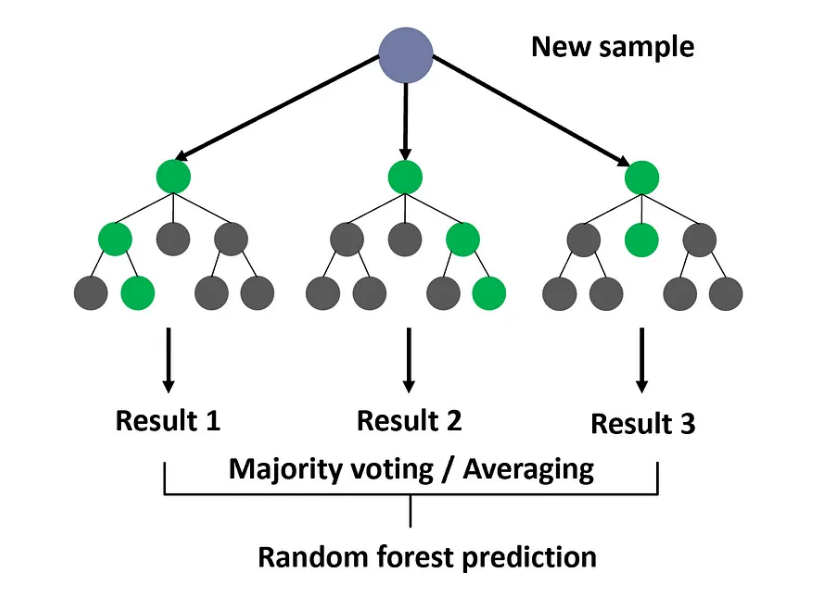

In [20]:
# Import Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pickle import dump

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model menggunakan data training yang telah dinormalisasi
rf_model.fit(X_train_minmax, y_train)

# Melakukan prediksi pada data testing yang telah dinormalisasi
y_pred_rf = rf_model.predict(X_test_minmax)

# Mengukur akurasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy Random Forest with all features: {accuracy_rf * 100:.4f}%")

# Menyimpan model yang telah dilatih
dump(rf_model, open('rf_sirtuin6.pkl', 'wb'))

Accuracy Random Forest with all features: 86.6667%


#LINK STREAMLIT

link streamlit klasifikasi sirtuin ada di bawah ini :

https://klasifikasi-sirtuin6-pycaret.streamlit.app/